In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [3]:
# Liest die CSV-Datei 'neu.csv' aus dem Verzeichnis './NEUER DATENSATZ/' ein und speichert sie in der Variable 'dataset'
dataset = pd.read_csv("../messages.csv")

# Die ersten 10 Zeilen ausgeben
print(dataset.head(10))

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...


In [4]:
# Die letzten 10 Zeilen ausgeben
print(dataset.tail(10))

     Category                                            Message
5562      ham  Ok lor... Sony ericsson salesman... I ask shuh...
5563      ham                                Ard 6 like dat lor.
5564      ham  Why don't you wait 'til at least wednesday to ...
5565      ham                                       Huh y lei...
5566     spam  REMINDER FROM O2: To get 2.50 pounds free call...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name


In [5]:
# Ersetzt alle fehlenden Werte (NaN) in der Spalte 'Message' des Datensatzes durch leere Zeichenketten ("")
dataset["Message"].fillna("", inplace=True)

# Teilt jede Nachricht in der Spalte 'Message' des Datensatzes in eine Liste von Wörtern auf und speichert diese in 'tokenized_messages'
tokenized_messages = dataset["Message"].apply(lambda x: x.split())

# Zählt die Häufigkeit jedes Wortes in jeder Nachricht und speichert diese Zählungen in 'word_counts_list'
word_counts_list = [Counter(message) for message in tokenized_messages]

# Erstellt einen neuen DataFrame 'transformed_df' aus der 'word_counts_list', ersetzt fehlende Werte durch 0 und konvertiert alle Werte in Ganzzahlen
transformed_df = pd.DataFrame(word_counts_list).fillna(0).astype(int)

# Fügt eine neue Spalte 'Mssg. No.' am Anfang des DataFrame 'transformed_df' ein, die die Nummer jeder Nachricht enthält
transformed_df.insert(0, "Mssg. No.", [f"Mssg. {i+1}" for i in range(len(dataset))])

# Fügt eine neue Spalte 'Prediction' am Ende des DataFrame 'transformed_df' ein, die die Kategorie jeder Nachricht aus dem ursprünglichen Datensatz enthält
transformed_df.insert(len(transformed_df.columns), "Prediction", [dataset["Category"][i] for i in range(len(dataset))])

# Ersetzt 'ham' durch 0 und 'spam' durch 1 in der Spalte 'Prediction'
transformed_df["Prediction"] = transformed_df["Prediction"].map({"ham": 0, "spam": 1})

# Speichert den transformierten DataFrame 'transformed_df' als CSV-Datei 'messages2.csv'
transformed_df.to_csv("../messages2.csv", index=False)

# Gibt den transformierten DataFrame 'transformed_df' auf der Konsole aus
print(transformed_df)

       Mssg. No.  Go  until  jurong  point,  crazy..  Available  only  in  \
0        Mssg. 1   1      1       1       1        1          1     1   1   
1        Mssg. 2   0      0       0       0        0          0     0   0   
2        Mssg. 3   0      0       0       0        0          0     0   1   
3        Mssg. 4   0      0       0       0        0          0     0   0   
4        Mssg. 5   0      0       0       0        0          0     0   0   
...          ...  ..    ...     ...     ...      ...        ...   ...  ..   
5567  Mssg. 5568   0      0       0       0        0          0     0   0   
5568  Mssg. 5569   0      0       0       0        0          0     0   0   
5569  Mssg. 5570   0      0       0       0        0          0     0   1   
5570  Mssg. 5571   0      0       0       0        0          0     0   1   
5571  Mssg. 5572   0      0       0       0        0          0     0   0   

      bugis  ...  £750  087187272008  NOW1!  esplanade  Pity,  So...any  \


In [6]:
# Laden der Daten aus der CSV-Datei 'messages.csv' in einen DataFrame 'df'
df = pd.read_csv("../messages2.csv")

# Nimmt alle Spalten außer der ersten und der letzten (Mssg. No. & Prediction) aus dem DataFrame und speichert ihre Werte in X
X = df[df.columns[1:-1]].values

# Nimmt die letzte Spalte aus dem DataFrame und speichert ihre Werte in y
y = df[df.columns[-1]].values

# Erstellen eines neuen DataFrame 'X_df' mit den Feature-Daten (alle Spalten außer der ersten und letzten)  
X_df = df[df.columns[1:-1]]

In [7]:
# Dimensionalität des DataFrame ausgeben
print(df.shape)


# Die ersten 10 Zeilen ausgeben
print(df.head(10))

(5572, 15688)
  Mssg. No.  Go  until  jurong  point,  crazy..  Available  only  in  bugis  \
0   Mssg. 1   1      1       1       1        1          1     1   1      1   
1   Mssg. 2   0      0       0       0        0          0     0   0      0   
2   Mssg. 3   0      0       0       0        0          0     0   1      0   
3   Mssg. 4   0      0       0       0        0          0     0   0      0   
4   Mssg. 5   0      0       0       0        0          0     0   0      0   
5   Mssg. 6   0      0       0       0        0          0     0   0      0   
6   Mssg. 7   0      0       0       0        0          0     0   0      0   
7   Mssg. 8   0      0       0       0        0          0     0   0      0   
8   Mssg. 9   0      0       0       0        0          0     0   0      0   
9  Mssg. 10   0      0       0       0        0          0     0   0      0   

   ...  £750  087187272008  NOW1!  esplanade  Pity,  So...any  suggestions?  \
0  ...     0             0      0    

In [8]:
# Die letzten 10 Zeilen ausgeben
print(df.tail(10))

       Mssg. No.  Go  until  jurong  point,  crazy..  Available  only  in  \
5562  Mssg. 5563   0      0       0       0        0          0     0   0   
5563  Mssg. 5564   0      0       0       0        0          0     0   0   
5564  Mssg. 5565   0      0       0       0        0          0     0   0   
5565  Mssg. 5566   0      0       0       0        0          0     0   0   
5566  Mssg. 5567   0      0       0       0        0          0     0   0   
5567  Mssg. 5568   0      0       0       0        0          0     0   0   
5568  Mssg. 5569   0      0       0       0        0          0     0   0   
5569  Mssg. 5570   0      0       0       0        0          0     0   1   
5570  Mssg. 5571   0      0       0       0        0          0     0   1   
5571  Mssg. 5572   0      0       0       0        0          0     0   0   

      bugis  ...  £750  087187272008  NOW1!  esplanade  Pity,  So...any  \
5562      0  ...     0             0      0          0      0         0   
55

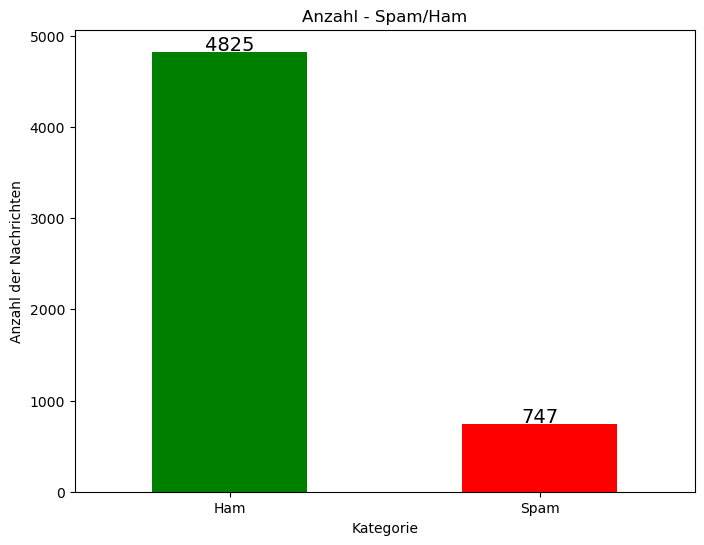

In [9]:
# Zählen, wie viele Nachrichten als Spam und wie viele als Ham klassifiziert sind
spam_ham_counts = df['Prediction'].value_counts()

# Erstellen eines Balkendiagramms
plt.figure(figsize=(8, 6))
spam_ham_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Anzahl - Spam/Ham')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl der Nachrichten')
plt.xticks(ticks=[1, 0], labels=['Spam', 'Ham'], rotation=0)

# Hinzufuegen von Werten auf den Balken
for x, y in zip([0, 1], spam_ham_counts):
    plt.text(x, y + 10, str(y), ha='center', fontsize=14)
    
plt.show()

/var/folders/m9/q7rkf7wx01s5d03z_r0gf9th0000gn/T/ipykernel_2199/3969654336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["transformed_text"] = X_df.apply(lambda row: " ".join(


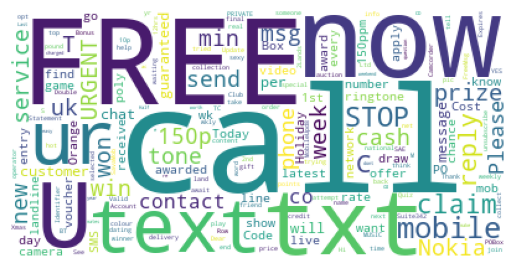

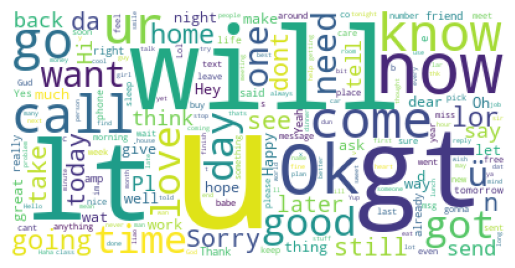

In [10]:
# Hinzufügen einer neuen Spalte 'transformed_text' zum DataFrame 'X_df', die für jede Zeile alle verwendeten Woerter enthält
# Dieser Text wird erzeugt, indem für jede Spalte die Anzahl der Vorkommen des Spaltennamens entsprechend dem Wert in dieser Zeile wiederholt wird
X_df["transformed_text"] = X_df.apply(lambda row: " ".join(
    sum([[col] * row[col] for col in X_df.columns], [])), axis=1)
# Übertragen der 'transformed_text' Spalte vom DataFrame 'X_df' zum ursprünglichen DataFrame 'df'
df['transformed_text'] = X_df['transformed_text']

# Erstellen einer Wortwolke für die Zeilen in 'df', wo die Vorhersage ('Prediction') 1 (Spam) ist.
# Die Wortwolke wird mit einem weißen Hintergrund und ohne Wortkombinationen ('collocations') generiert
# Der generierte Text wird aus der Verkettung ('str.cat') der 'transformed_text' Spaltenwerte zusammengesetzt
wordcloud = WordCloud(background_color='white', collocations=False).generate(
    df[df['Prediction'] == 1]['transformed_text'].str.cat(sep=" "))

# Anzeigen der Wortwolke
# Deaktivieren der Achsenbeschriftungen
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Erstellen einer Wortwolke für die Zeilen in 'df', wo die Vorhersage ('Prediction') 0 (Ham) ist.
# Die Wortwolke wird mit einem weißen Hintergrund und ohne Wortkombinationen ('collocations') generiert
# Der generierte Text wird aus der Verkettung ('str.cat') der 'transformed_text' Spaltenwerte zusammengesetzt
wordcloud = WordCloud(background_color='white', collocations=False).generate(
    df[df['Prediction'] == 0]['transformed_text'].str.cat(sep=" "))

# Anzeigen der Wortwolke
# Deaktivieren der Achsenbeschriftungen
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
# Berechnen der Gesamtanzahl der Wörter in jeder Nachricht für Spam und Ham
spam_word_counts = df[df['Prediction'] == 1].drop('Prediction', axis=1).sum(axis=1)
ham_word_counts = df[df['Prediction'] == 0].drop('Prediction', axis=1).sum(axis=1)

# Erstellen eines Plots für Spam
plt.figure(figsize=(10, 6))
plt.hist(spam_word_counts, bins=50, color='red', alpha=0.7, label='Spam')
plt.title('Verteilung der Wortanzahl bei Spam')
plt.xlabel('Anzahl der Wörter')
plt.ylabel('Anzahl der Nachrichten')
plt.legend()
plt.show()

# Erstellen eines Plots für Ham
plt.figure(figsize=(10, 6))
plt.hist(ham_word_counts, bins=50, color='green', alpha=0.7, label='Ham')
plt.title('Verteilung der Wortanzahl bei Ham')
plt.xlabel('Anzahl der Wörter')
plt.ylabel('Anzahl der Nachrichten')
plt.legend()
plt.show()

# Erstellen eines kombinierten Plots für Spam- und Ham
plt.figure(figsize=(10, 6))
plt.hist(spam_word_counts, bins=50, color='red', alpha=0.7, label='Spam', edgecolor='black')
plt.hist(ham_word_counts, bins=50, color='green', alpha=0.7, label='Ham', edgecolor='black')
plt.title('Verteilung der Wortanzahl')
plt.xlabel('Anzahl der Wörter')
plt.ylabel('Anzahl der Nachrichten')
plt.legend()
plt.show()

# Berechnen des Durchschnitts und der Standardabweichung für Spam-Nachrichten
spam_durchschnitt = spam_word_counts.mean()
spam_standardabweichung = spam_word_counts.std()

# Berechnen des Durchschnitts und der Standardabweichung für Ham-Nachrichten
ham_durchschnitt = ham_word_counts.mean()
ham_standardabweichung = ham_word_counts.std()

# Ausgeben der Ergebnisse
print(f"Durchschnittliche Wortanzahl in Spam-Nachrichten: {spam_durchschnitt:.2f}")
print(f"Standardabweichung der Wortanzahl in Spam-Nachrichten: {spam_standardabweichung:.2f}")

print(f"Durchschnittliche Wortanzahl in Ham-Nachrichten: {ham_durchschnitt:.2f}")
print(f"Standardabweichung der Wortanzahl in Ham-Nachrichten: {ham_standardabweichung:.2f}")

TypeError: can only concatenate str (not "int") to str